<a href="https://colab.research.google.com/github/paxianmichael/AI-Self-Ording-PoC/blob/main/metrics_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data viz

## JSON accuracy

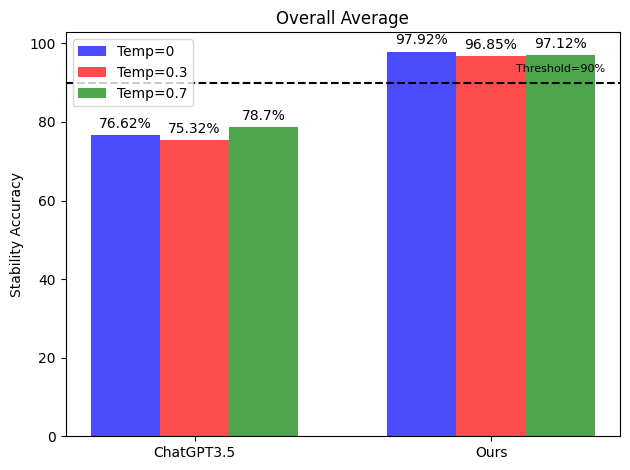

In [ ]:
#based on #100 data

mean_probabilities = [
    [76.62, 97.92],  # temp=0
    [75.32, 96.85],   # temp=0.3
    [78.70, 97.12]   # temp=0.7
]

labels = ['ChatGPT3.5', 'Ours']
temp_values = ['Temp=0', 'Temp=0.3', 'Temp=0.7']
bar_width = 0.35

r1 = np.arange(len(labels)) * 1.5  # the label locations for temp=0
r2 = [x + bar_width for x in r1]  # the label locations for temp=0.3
r3 = [x + bar_width*2 for x in r1]  # label locations for temp=0.7

fig, ax = plt.subplots()
rects1 = ax.bar(r1, mean_probabilities[0], bar_width, label='Temp=0', color='b', alpha=0.7)
rects2 = ax.bar(r2, mean_probabilities[1], bar_width, label='Temp=0.3', color='r', alpha=0.7)
rects3 = ax.bar(r3, mean_probabilities[2], bar_width, label='Temp=0.7', color='g', alpha=0.7)

# x,y wording
ax.set_ylabel('Stability Accuracy')
ax.set_title('Overall Average')
ax.set_xticks([r + bar_width for r in r1])
ax.set_xticklabels(labels)
ax.legend()

# Adding a line for the 90% goal
ax.axhline(y=90, color='black', linestyle='--', label='Threshold=90%')
ax.annotate('Threshold=90%', xy=(r3[1], 90), textcoords="offset points", xytext=(0,10), ha='center', va='center', fontsize=8, color='black')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

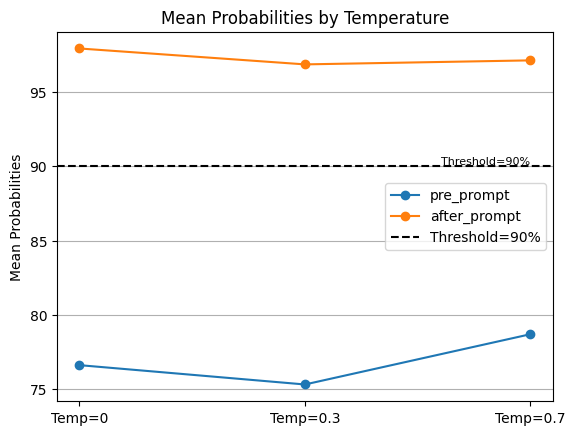

In [ ]:
# line plot

labels = ['Temp=0', 'Temp=0.3', 'Temp=0.7']
pre_prompt = [x[0] for x in mean_probabilities]
after_prompt = [x[1] for x in mean_probabilities]

plt.plot(labels, pre_prompt, marker='o', label='pre_prompt')
plt.plot(labels, after_prompt, marker='o', label='after_prompt')

# Add goal line and label
plt.axhline(y=90, color='black', linestyle='--', label='Threshold=90%')
plt.text(labels[-1], 90, 'Threshold=90%', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=8)

plt.ylabel('Mean Probabilities')
plt.title('Mean Probabilities by Temperature')
plt.legend()
plt.grid(axis='y')

plt.show()

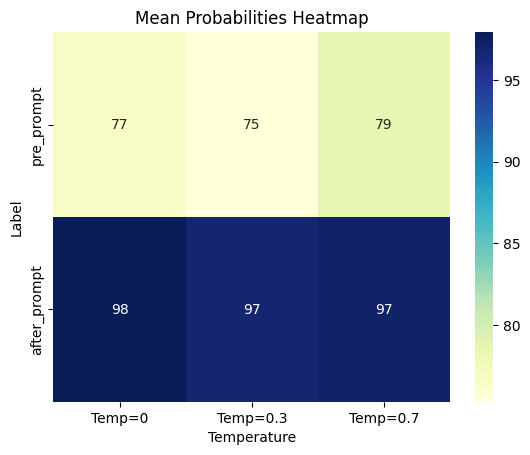

In [ ]:
# heat map

mean_probabilities = [
    [76.62, 97.92],  # temp=0
    [75.32, 96.85],   # temp=0.3
    [78.70, 97.12]   # temp=0.7
]

labels = ['pre_prompt', 'after_prompt']
temps = ['Temp=0', 'Temp=0.3', 'Temp=0.7']

# Transpose mean_probabilities for heatmap
data = [[mean_probabilities[j][i] for j in range(len(temps))] for i in range(len(labels))]

sns.heatmap(data, annot=True, cmap="YlGnBu", xticklabels=temps, yticklabels=labels)

plt.title('Mean Probabilities Heatmap')
plt.xlabel('Temperature')
plt.ylabel('Label')
plt.show()

## Conversation logics

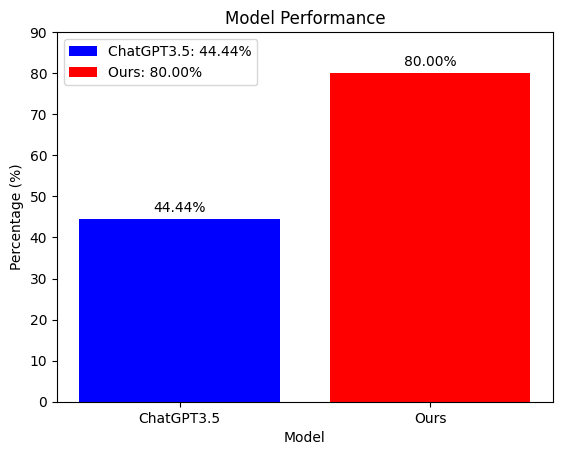

In [2]:
# chatgpt vs ours

var1 = 0.4444
var2 = 0.80

var1_percentage = var1 * 100
var2_percentage = var2 * 100

# Creating a bar chart with different colors
plt.bar('ChatGPT3.5', var1_percentage, color='blue', label=f'ChatGPT3.5: {var1_percentage:.2f}%')
plt.bar('Ours', var2_percentage, color='red', label=f'Ours: {var2_percentage:.2f}%')

# Titles and labels
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')

# Adding text annotations at the top of each bar
plt.text('ChatGPT3.5', var1_percentage + 1, f'{var1_percentage:.2f}%', ha='center', va='bottom', color='black')
plt.text('Ours', var2_percentage + 1, f'{var2_percentage:.2f}%', ha='center', va='bottom', color='black')
plt.ylim(0, var2_percentage + 10)

plt.legend()
plt.show()

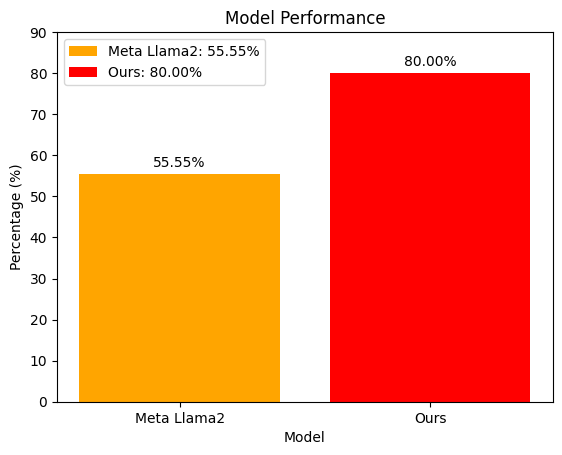

In [3]:
#meta Llama2

var1 = 0.5555
var2 = 0.80

var1_percentage = var1 * 100
var2_percentage = var2 * 100

# Creating a bar chart with different colors
plt.bar('Meta Llama2', var1_percentage, color='orange', label=f'Meta Llama2: {var1_percentage:.2f}%')
plt.bar('Ours', var2_percentage, color='red', label=f'Ours: {var2_percentage:.2f}%')

# Titles and labels
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')

# Adding text annotations at the top of each bar
plt.text('Meta Llama2', var1_percentage + 1, f'{var1_percentage:.2f}%', ha='center', va='bottom', color='black')
plt.text('Ours', var2_percentage + 1, f'{var2_percentage:.2f}%', ha='center', va='bottom', color='black')
plt.ylim(0, var2_percentage + 10)

plt.legend()
plt.show()

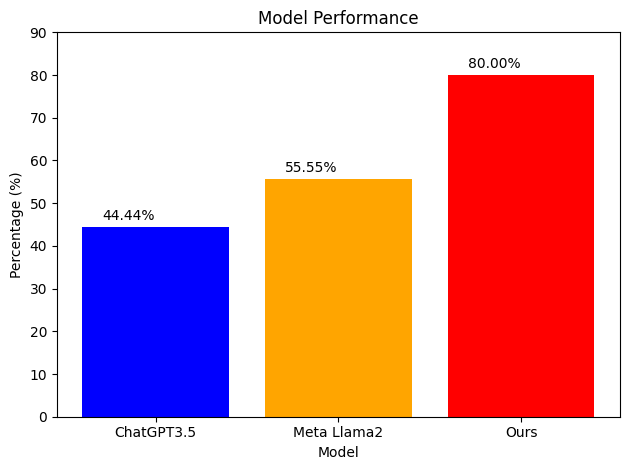

In [3]:
# overall comparison

chatgpt = 0.4444 * 100
meta_llama = 0.5555 * 100
ours = 0.80 * 100

# Bar positions
models = ['ChatGPT3.5', 'Meta Llama2', 'Ours']
values = [chatgpt, meta_llama, ours]
colors = ['blue', 'orange', 'red']

# Creating a bar chart with different colors
bars = plt.bar(models, values, color=colors)

# Add data value text above each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15,
             bar.get_height() + 1,
             f'{values[i]:.2f}%',
             ha='center',
             va='bottom',
             color='black')

# Titles and labels
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')

# Adjust the y-axis limit
plt.ylim(0, max(values) + 10)

# Show the chart
plt.tight_layout()
plt.show()

In [ ]:
var1 = 0.5333
var2 = 0.7666

var1_percentage = var1 * 100
var2_percentage = var2 * 100

# Creating a bar chart with different colors
plt.bar('ChatGPT3.5', var1_percentage, color='blue', label=f'ChatGPT3.5: {var1_percentage:.2f}%')
plt.bar('Ours', var2_percentage, color='red', label=f'Ours: {var2_percentage:.2f}%')

# Titles and labels
plt.title('Logical Accuracy Comparison')
plt.xlabel('Model Performance')
plt.ylabel('Percentage (%)')

# Adding text annotations at the top of each bar
plt.text('ChatGPT3.5', var1_percentage + 1, f'{var1_percentage:.2f}%', ha='center', va='bottom', color='black')
plt.text('Ours', var2_percentage + 1, f'{var2_percentage:.2f}%', ha='center', va='bottom', color='black')
plt.ylim(0, var2_percentage + 10)

plt.legend()
plt.show()

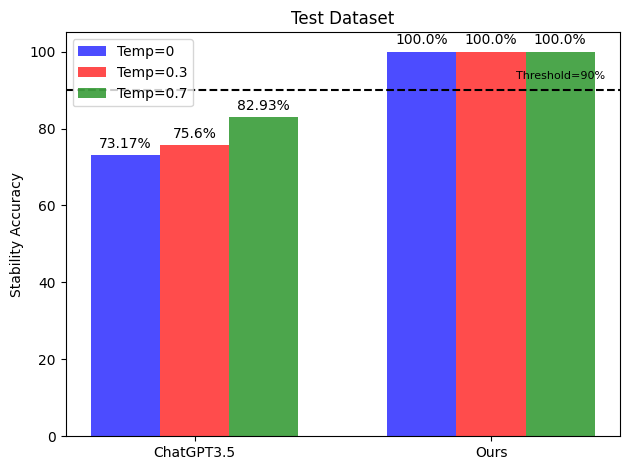

In [ ]:
mean_probabilities = [
    [73.17, 100],  # temp=0
    [75.60, 100],   # temp=0.3
    [82.93, 100]   # temp=0.7
]

labels = ['ChatGPT3.5', 'Ours']
temp_values = ['Temp=0', 'Temp=0.3', 'Temp=0.7']
bar_width = 0.35

r1 = np.arange(len(labels)) * 1.5  # the label locations for temp=0
r2 = [x + bar_width for x in r1]  # the label locations for temp=0.3
r3 = [x + bar_width*2 for x in r1]  # label locations for temp=0.7

fig, ax = plt.subplots()
rects1 = ax.bar(r1, mean_probabilities[0], bar_width, label='Temp=0', color='b', alpha=0.7)
rects2 = ax.bar(r2, mean_probabilities[1], bar_width, label='Temp=0.3', color='r', alpha=0.7)
rects3 = ax.bar(r3, mean_probabilities[2], bar_width, label='Temp=0.7', color='g', alpha=0.7)

# x,y wording
ax.set_ylabel('Stability Accuracy')
ax.set_title('Test Dataset')
ax.set_xticks([r + bar_width for r in r1])
ax.set_xticklabels(labels)
ax.legend()

# Adding a line for the 90% goal
ax.axhline(y=90, color='black', linestyle='--', label='Threshold=90%')
ax.annotate('Threshold=90%', xy=(r3[1], 90), textcoords="offset points", xytext=(0,10), ha='center', va='center', fontsize=8, color='black')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
#plt.savefig("test_dataset.png")

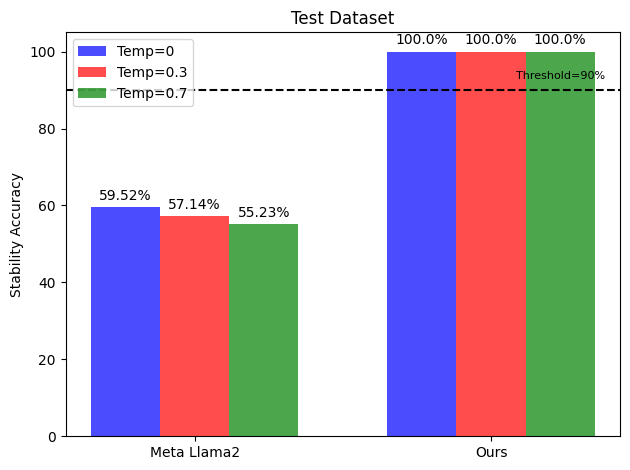

In [ ]:
mean_probabilities = [
    [59.52, 100],  # temp=0
    [57.14, 100],   # temp=0.3
    [55.23, 100]   # temp=0.7
]

labels = ['Meta Llama2', 'Ours']
temp_values = ['Temp=0', 'Temp=0.3', 'Temp=0.7']
bar_width = 0.35

r1 = np.arange(len(labels)) * 1.5  # the label locations for temp=0
r2 = [x + bar_width for x in r1]  # the label locations for temp=0.3
r3 = [x + bar_width*2 for x in r1]  # label locations for temp=0.7

fig, ax = plt.subplots()
rects1 = ax.bar(r1, mean_probabilities[0], bar_width, label='Temp=0', color='b', alpha=0.7)
rects2 = ax.bar(r2, mean_probabilities[1], bar_width, label='Temp=0.3', color='r', alpha=0.7)
rects3 = ax.bar(r3, mean_probabilities[2], bar_width, label='Temp=0.7', color='g', alpha=0.7)

# x,y wording
ax.set_ylabel('Stability Accuracy')
ax.set_title('Test Dataset')
ax.set_xticks([r + bar_width for r in r1])
ax.set_xticklabels(labels)
ax.legend()

# Adding a line for the 90% goal
ax.axhline(y=90, color='black', linestyle='--', label='Threshold=90%')
ax.annotate('Threshold=90%', xy=(r3[1], 90), textcoords="offset points", xytext=(0,10), ha='center', va='center', fontsize=8, color='black')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()



# Example Demonstration

**Question: "I’ll have two Spicy Deluxe Sandwiches. Wait, make it three and change one to a Grilled Chicken Club Sandwich."**

In [ ]:
## example1 pre_prompt

expone_pre = {
  "message": "Your order has been updated. You have 3 Spicy Deluxe Sandwiches and 1 Grilled Chicken Club Sandwich.",
  "cart": [
    {
      "name": "Spicy Deluxe Sandwich",
      "quantity": 3,
      "price": 5.29,
      "notes": ""
    },

    {
      "name": "Grilled Chicken Club Sandwich",
      "quantity": 1,
      "price": 4.26,
      "notes": ""
    }
  ]
}


total_price = 0.0
for item in expone_pre["cart"]:
    item_qty = int(item["quantity"])
    item_price = float(item["price"])

    total_price += item_price * item_qty

print("Total price: ${:.2f}".format(total_price))

Total price: $20.13


In [ ]:
# example1 after_prompt

expone_after = {"message": "Your order has been added to the cart.",
 "cart": [{
    "name": "Spicy Deluxe Sandwich",
    "quantity": "2",
    "price": "5.29",
    "notes": "Standard order"
    },

     {"name": "Grilled Chicken Club Sandwich",
      "quantity": "1",
      "price": "4.26",
      "notes": "Standard order"}]
 }

total_price = 0.0
for item in expone_after["cart"]:
    item_qty = int(item["quantity"])
    item_price = float(item["price"])
    total_price += item_price * item_qty

print("Total price: ${:.2f}".format(total_price))

Total price: $14.84


# **Summary && Take Away**
  

*   JSON format accuracy ensure capability of calculating price
*   Logical accuracy ensure to calculate correct price
*   New prompt is able to solve:
    - a series of "chain of changing instructions" eg: ("I’ll have two Spicy Deluxe Sandwiches. Wait, make it three and change one to a Grilled Chicken Club Sandwich.)
    - JSON format instability

# **Model Infrastructure**


*   Data Engineering
    - structured data in labeled conversation JSON format
    - split data into training set and testing set

*   Prompt Engineering
    - craft prompt
    - advanced techinque in prompt
    - different prompt comparison

*   Fine-Tuning
    - prepare data
    - upload files
    - create a fine-tuning job
    - implement a fine-tuned model

*   Evaluation metrics && Visualization
    - JSON output accuracy
    - Conversation logics accuracy

